### Reading the data

In [1]:
file = open('C:/Users/archi/Desktop/data1.txt', 'r').read().strip()
data = file.split("\n")
data = list(map(float,data))


### EDA

Text(0, 0.5, 'No of times')

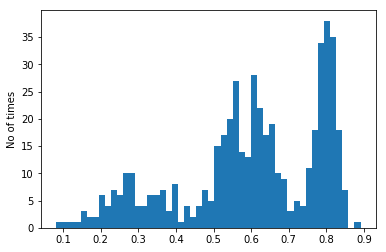

In [22]:
import matplotlib.pyplot as plt
plt.hist(data, bins=50)
plt.ylabel('No of times')


### Gaussian Probablity

In [3]:
import math
from math import *


def normpdf(x, mn, sdv):
    v1 = math.exp(-(x-mn)**2/(2*(sdv**2)))
    v2 = (2*3.14*(sdv**2))**.5
    return v1/v2

### 3 Gaussian Cluster

In [14]:
mean1=-0.2
sd1=0.1
mean2=0.5
sd2=0.1
mean3=1.5
sd3=0.1
pc1=0.4
pc2=0.3
pc3=0.3
likelyhood_old=-10
Diff=10
k=0
likely=[]
iteration=[]
    
check=0
while check==0:
    mean1_inter=0
    len1_inter=0
    sd1_inter=0
    
    mean2_inter=0
    len2_inter=0
    sd2_inter=0
    
    mean3_inter=0
    len3_inter=0
    sd3_inter=0
    likelyhood=0
    
    #print("I Mean",mean1,mean2,mean3)
    #print("I Mean",sd1,sd2,sd3)
    
    for i in range(len(data)):

        p1=normpdf(data[i],mean1,sd1)*pc1
        p2=normpdf(data[i],mean2,sd2)*pc2
        p3=normpdf(data[i],mean3,sd3)*pc3
        
        dn=p1+p2+p3
        likelyhood+=math.log(dn)
    
        
        #print("D value",dn)
        ratio1=p1/dn
        ratio2=p2/dn
        ratio3=p3/dn
        
        #print(ratio1,ratio2,ratio3)
        #print(ratio1)
        
        len1_inter+=ratio1
        mean1_inter+=data[i]*ratio1
        sd1_inter+=((data[i]**2)*(ratio1))
        
        len2_inter+=ratio2
        mean2_inter+=data[i]*ratio2
        sd2_inter+=((data[i]**2)*(ratio2))
        
        
        len3_inter+=ratio3
        mean3_inter+=data[i]*ratio3
        sd3_inter+=((data[i]**2)*(ratio3))
        
        
    Diff=likelyhood-likelyhood_old
    likelyhood_old=likelyhood
    mean1=mean1_inter/len1_inter
    sd1=((sd1_inter/len1_inter) - (mean1_inter/len1_inter)**2)**0.5
    pc1=len1_inter/(len1_inter+len2_inter+len3_inter)
    
    
    mean2=mean2_inter/len2_inter
    sd2=((sd2_inter/len2_inter) - (mean2_inter/len2_inter)**2)**0.5
    pc2=len2_inter/(len1_inter+len2_inter+len3_inter)
    
    
    mean3=mean3_inter/len3_inter
    sd3=((sd3_inter/len3_inter) - (mean3_inter/len3_inter)**2)**0.5
    pc3=len3_inter/(len1_inter+len2_inter+len3_inter)
    
    #print(len1_inter+len2_inter+len3_inter)
    k=k+1
    if(Diff<0.001 and k+1>20):
        check=1
    #print("Iteration",k)
    #print("Mean :",mean1,mean2,mean3)
    #print("SD",sd1,sd2,sd3)
    #print("LH",likelyhood)
    #print(Diff)
    likely.append(likelyhood)
    iteration.append(k)
    #print(Diff)
    
    
    
    #print(pc1+pc2+pc3)

For cluster 1 mean=  0.28983589843379143 sd = 0.08414141530233518 probablity of cluster = 0.1938181013023901
For cluster 2 mean=  0.5916173708561678 sd = 0.06789598031993199 probablity of cluster = 0.4833618923605128
For cluster 3 mean=  0.8005667538338164 sd = 0.026323480871442338 probablity of cluster = 0.3228200063370972
Likelihood Value =  285.1203856672273 Number of iterations =  47


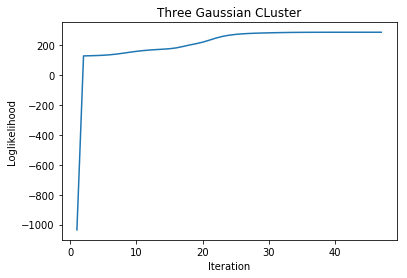

In [15]:
print("For cluster 1 mean= ",mean1,"sd =",sd1,"probablity of cluster =",pc1)
print("For cluster 2 mean= ",mean2,"sd =",sd2,"probablity of cluster =",pc2)
print("For cluster 3 mean= ",mean3,"sd =",sd3,"probablity of cluster =",pc3)

print("Likelihood Value = ",likely[len(likely)-1],"Number of iterations = ",iteration[len(iteration)-1])
plt.plot(iteration,likely)
plt.title('Three Gaussian CLuster')
plt.xlabel('Iteration')
plt.ylabel('Loglikelihood')
plt.show()

### 2 Gaussian Cluster

In [16]:
mean1=-0.2
sd1=0.1
mean2=0.5
sd2=0.1
pc1=0.4
pc2=0.3
likelyhood_old=0
Diff=10
k=0
#print(Diff)
likely=[]
iteration=[]
check=0
while check==0:
    mean1_inter=0
    len1_inter=0
    sd1_inter=0
    
    mean2_inter=0
    len2_inter=0
    sd2_inter=0
    
    likelyhood=0
    
    #print("I Mean",mean1,mean2,mean3)
    #print("I Mean",sd1,sd2,sd3)
    
    for i in range(len(data)):

        p1=normpdf(data[i],mean1,sd1)*pc1
        p2=normpdf(data[i],mean2,sd2)*pc2
        #p3=normpdf(data[i],mean3,sd3)*pc3
        
        dn=p1+p2
        likelyhood+=math.log(dn)
    
        
        #print("D value",dn)
        ratio1=p1/dn
        ratio2=p2/dn
        
        #print(ratio1,ratio2,ratio3)
        #print(ratio1)
        
        len1_inter+=ratio1
        mean1_inter+=data[i]*ratio1
        sd1_inter+=((data[i]**2)*(ratio1))
        
        len2_inter+=ratio2
        mean2_inter+=data[i]*ratio2
        sd2_inter+=((data[i]**2)*(ratio2))
        
        
        
    Diff=likelyhood-likelyhood_old
    if(Diff<0.001 and k+1>20):
        check=1
    likelyhood_old=likelyhood
    mean1=mean1_inter/len1_inter
    sd1=((sd1_inter/len1_inter) - (mean1_inter/len1_inter)**2)**0.5
    pc1=len1_inter/(len1_inter+len2_inter)
    
    
    mean2=mean2_inter/len2_inter
    sd2=((sd2_inter/len2_inter) - (mean2_inter/len2_inter)**2)**0.5
    pc2=len2_inter/(len1_inter+len2_inter)
    
    
    #print(len1_inter+len2_inter+len3_inter)
    k=k+1
    #print("Iteration",k)
    #print("Mean :",mean1,mean2)
    #print("SD",sd1,sd2)
    #print("LH",likelyhood)
    #print(Diff)
    likely.append(likelyhood)
    iteration.append(k)
    
    
    #print(pc1+pc2+pc3)

For cluster 1 mean=  0.2735827189717292 sd = 0.07551587312062641 probablity of cluster = 0.16785886152396132
For cluster 2 mean=  0.6665412760106519 sd = 0.12481138878717397 probablity of cluster = 0.8321411384760387
Likelihood Value =  174.4446080527105 Number of iterations =  28


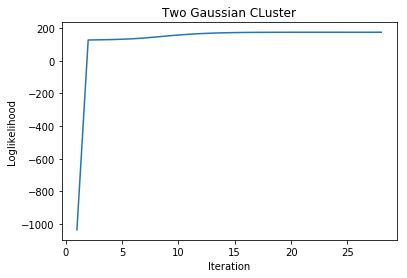

In [18]:
print("For cluster 1 mean= ",mean1,"sd =",sd1,"probablity of cluster =",pc1)
print("For cluster 2 mean= ",mean2,"sd =",sd2,"probablity of cluster =",pc2)

print("Likelihood Value = ",likely[len(likely)-1],"Number of iterations = ",iteration[len(iteration)-1])
plt.plot(iteration,likely)
plt.title('Two Gaussian CLuster')
plt.xlabel('Iteration')
plt.ylabel('Loglikelihood')
plt.show()

### 4 Gaussian Cluster

In [19]:
mean1=0.1
sd1=0.1
mean2=0.25
sd2=0.1
mean3=0.4
sd3=0.1
mean4=1.3
sd4=0.1
pc1=0.25
pc2=0.25
pc3=0.25
pc4=0.25

likelyhood_old=0
Diff=10
k=0
likely=[]
iteration=[]
check=0    


while check==0:
    mean1_inter=0
    len1_inter=0
    sd1_inter=0
    
    mean2_inter=0
    len2_inter=0
    sd2_inter=0
    
    mean3_inter=0
    len3_inter=0
    sd3_inter=0
    
    mean4_inter=0
    len4_inter=0
    sd4_inter=0
    
    
    likelyhood=0
    
    #print("I Mean",mean1,mean2,mean3)
    #print("I Mean",sd1,sd2,sd3)
    
    for i in range(len(data)):

        p1=normpdf(data[i],mean1,sd1)*pc1
        p2=normpdf(data[i],mean2,sd2)*pc2
        p3=normpdf(data[i],mean3,sd3)*pc3
        p4=normpdf(data[i],mean4,sd4)*pc4
        
        dn=p1+p2+p3+p4
        likelyhood+=math.log(dn)
    
        
        #print("D value",dn)
        ratio1=p1/dn
        ratio2=p2/dn
        ratio3=p3/dn
        ratio4=p4/dn
        
        #print(ratio1,ratio2,ratio3)
        #print(ratio1)
        
        len1_inter+=ratio1
        mean1_inter+=data[i]*ratio1
        sd1_inter+=((data[i]**2)*(ratio1))
        
        len2_inter+=ratio2
        mean2_inter+=data[i]*ratio2
        sd2_inter+=((data[i]**2)*(ratio2))
        
        
        len3_inter+=ratio3
        mean3_inter+=data[i]*ratio3
        sd3_inter+=((data[i]**2)*(ratio3))
        
        len4_inter+=ratio4
        mean4_inter+=data[i]*ratio4
        sd4_inter+=((data[i]**2)*(ratio4))
        
        
    Diff=likelyhood-likelyhood_old
    if(Diff<0.001 and k+1>20):
        check=1
    likelyhood_old=likelyhood
    mean1=mean1_inter/len1_inter
    sd1=((sd1_inter/len1_inter) - (mean1_inter/len1_inter)**2)**0.5
    pc1=len1_inter/(len1_inter+len2_inter+len3_inter+len4_inter)
    
    
    mean2=mean2_inter/len2_inter
    sd2=((sd2_inter/len2_inter) - (mean2_inter/len2_inter)**2)**0.5
    pc2=len2_inter/(len1_inter+len2_inter+len3_inter+len4_inter)
    
    
    mean3=mean3_inter/len3_inter
    sd3=((sd3_inter/len3_inter) - (mean3_inter/len3_inter)**2)**0.5
    pc3=len3_inter/(len1_inter+len2_inter+len3_inter+len4_inter)
    
    mean4=mean4_inter/len4_inter
    sd4=((sd4_inter/len4_inter) - (mean4_inter/len4_inter)**2)**0.5
    pc4=len4_inter/(len1_inter+len2_inter+len3_inter+len4_inter)
    
    #print(len1_inter+len2_inter+len3_inter)
    k=k+1
    
    #print(round(Diff,3))
    likely.append(likelyhood)
    iteration.append(k)
    
    
    
    #print(pc1+pc2+pc3)

For cluster 1 mean=  0.23558855661013897 sd = 0.0654477378874594 probablity of cluster = 0.04742706224254776
For cluster 2 mean=  0.3102409096371194 sd = 0.08422690786415384 probablity of cluster = 0.1490154128625675
For cluster 3 mean=  0.59212344669931 sd = 0.06718288405285334 probablity of cluster = 0.4802566487776963
For cluster 4 mean=  0.8005067309414463 sd = 0.02637634909629922 probablity of cluster = 0.3233008761171885
Likelihood Value =  285.25815300369834 Number of iterations =  48


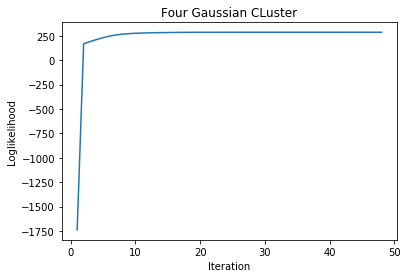

In [20]:
print("For cluster 1 mean= ",mean1,"sd =",sd1,"probablity of cluster =",pc1)
print("For cluster 2 mean= ",mean2,"sd =",sd2,"probablity of cluster =",pc2)
print("For cluster 3 mean= ",mean3,"sd =",sd3,"probablity of cluster =",pc3)
print("For cluster 4 mean= ",mean4,"sd =",sd4,"probablity of cluster =",pc4)

print("Likelihood Value = ",likely[len(likely)-1],"Number of iterations = ",iteration[len(iteration)-1])
plt.plot(iteration,likely)
plt.title('Four Gaussian CLuster')
plt.xlabel('Iteration')
plt.ylabel('Loglikelihood')
plt.show()